<a href="https://colab.research.google.com/github/sepma017/TransferLearning_Study/blob/master/01_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%9D%98_%EA%B8%B0%EC%B4%88%EC%9B%90%EB%A6%AC_20220318.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature_Engineering

In [2]:
from google.colab import files

uploaded = files.upload()

Saving battles.csv to battles.csv
Saving credit_default.xls to credit_default.xls


In [3]:
import numpy as np
import pandas as pd
from collections import Counter

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# params 세팅
params = {
    'legend.fontsize': 'x-large',
    'figure.figsize': (30, 10),
    'axes.labelsize': 'x-large',
    'axes.titlesize': 'x-large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large'
}

sns.set_style('whitegrid')
sns.set_context('talk')

plt.rcParams.update(params)

In [5]:
battles_df = pd.read_csv('/content/battles.csv')

In [6]:
battles_df.shape

(38, 25)

In [7]:
battles_df.dtypes

name                   object
year                    int64
battle_number           int64
attacker_king          object
defender_king          object
attacker_1             object
attacker_2             object
attacker_3             object
attacker_4             object
defender_1             object
defender_2             object
defender_3            float64
defender_4            float64
attacker_outcome       object
battle_type            object
major_death           float64
major_capture         float64
attacker_size         float64
defender_size         float64
attacker_commander     object
defender_commander     object
summer                float64
location               object
region                 object
note                   object
dtype: object

In [8]:
battles_df.describe()

,year,battle_number,defender_3,defender_4,major_death,major_capture,attacker_size,defender_size,summer
count,38.000000,38.000000,0.0,0.0,37.000000,37.000000,24.000000,19.000000,37.000000
mean,299.105263,19.500000,NaN,NaN,0.351351,0.297297,9942.541667,6428.157895,0.702703
std,0.689280,11.113055,NaN,NaN,0.483978,0.463373,20283.092065,6225.182106,0.463373
min,298.000000,1.000000,NaN,NaN,0.000000,0.000000,20.000000,100.000000,0.000000
25%,299.000000,10.250000,NaN,NaN,0.000000,0.000000,1375.000000,1070.000000,0.000000
50%,299.000000,19.500000,NaN,NaN,0.000000,0.000000,4000.000000,6000.000000,1.000000
75%,300.000000,28.750000,NaN,NaN,1.000000,1.000000,8250.000000,10000.000000,1.000000
max,300.000000,38.000000,NaN,NaN,1.000000,1.000000,100000.000000,20000.000000,1.000000


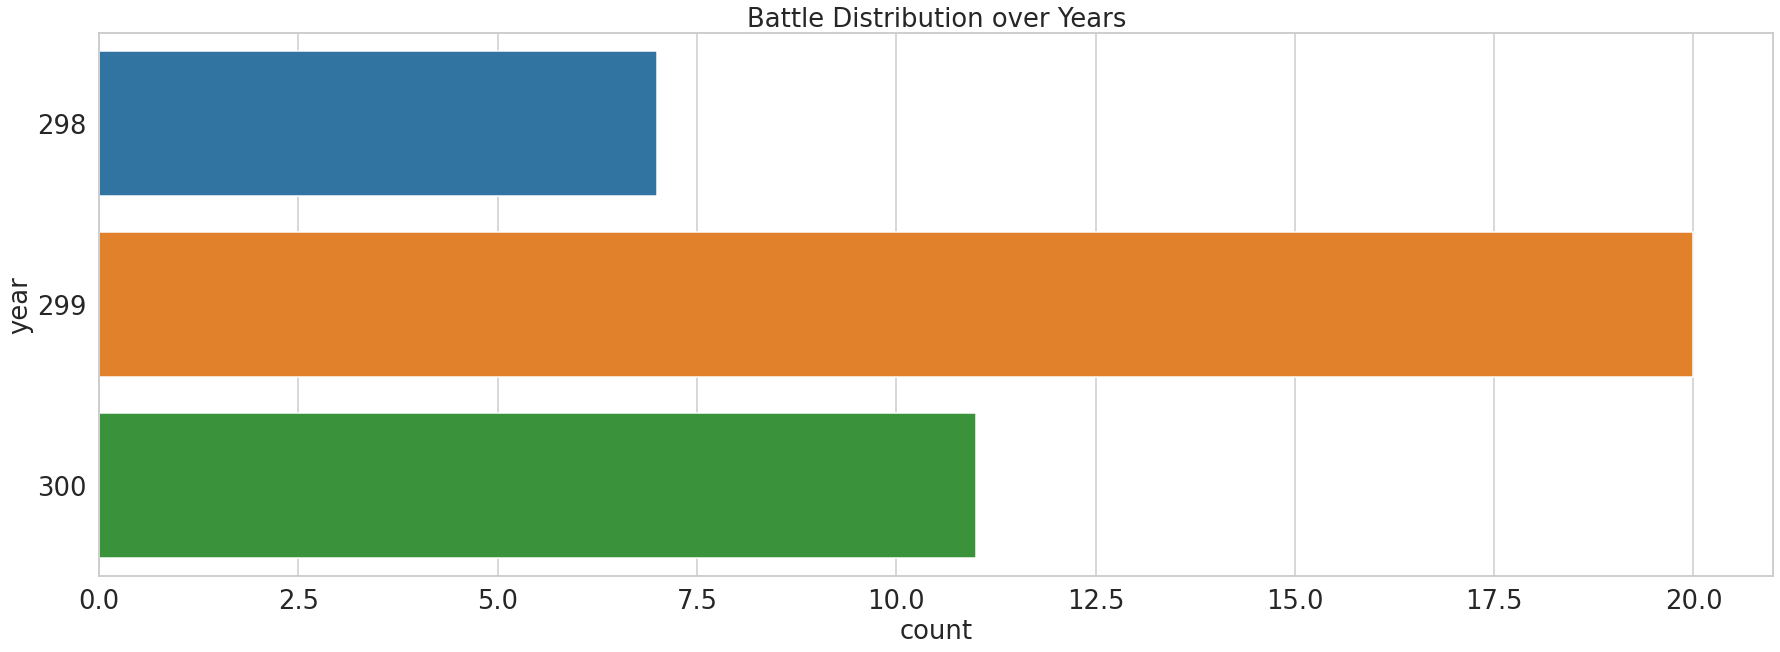

In [9]:
sns.countplot(y='year', data=battles_df)
plt.title('Battle Distribution over Years')
plt.show()

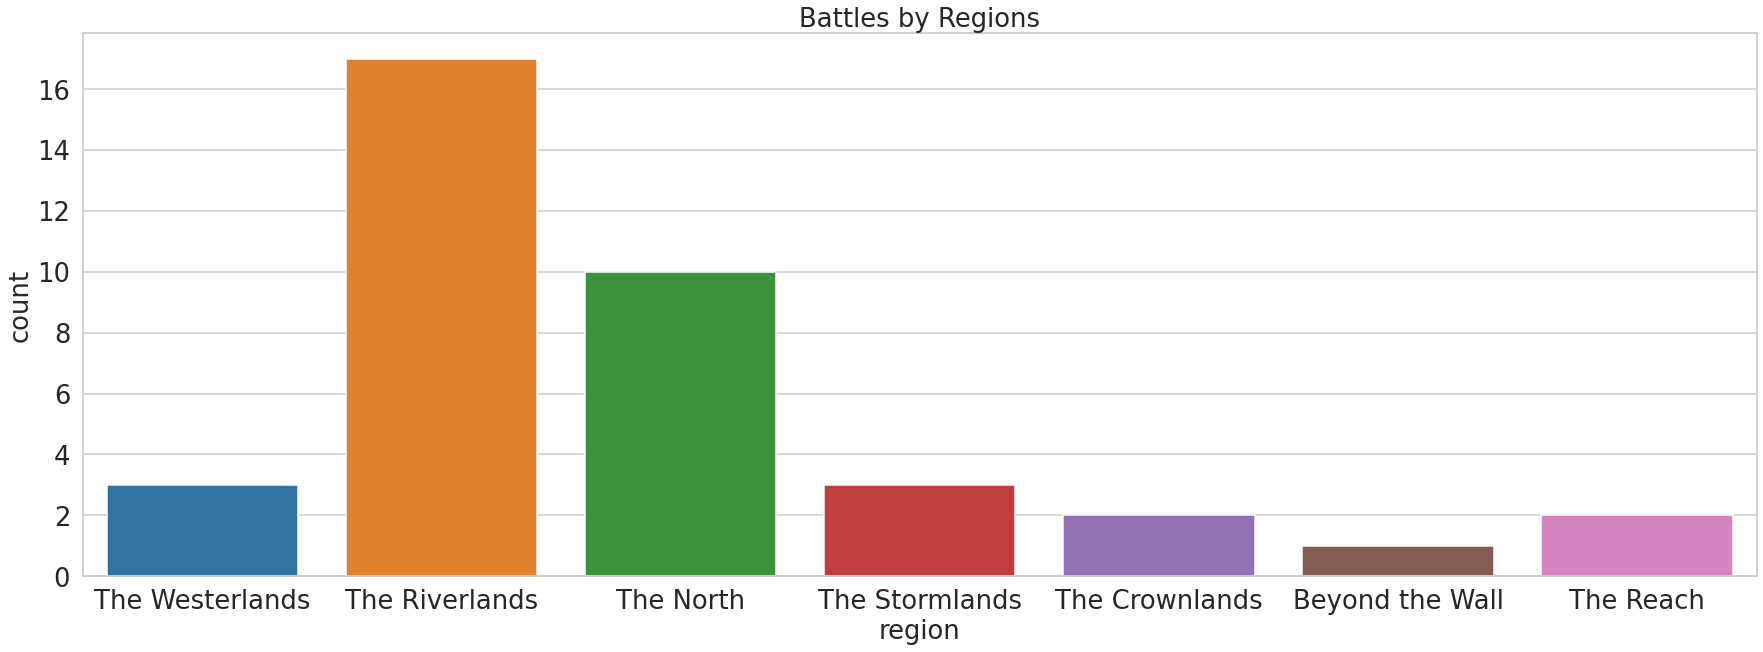

In [10]:
sns.countplot(x='region', data=battles_df)
plt.title('Battles by Regions')
plt.show()

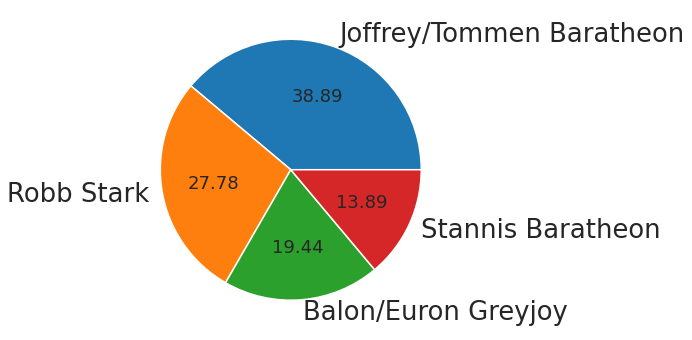

In [11]:
attacker_king = battles_df.attacker_king.value_counts()
attacker_king.name = '' # y-axis-label을 off로 해도 된다.
attacker_king.plot.pie(figsize=(6, 6), autopct='%.2f')

In [19]:
attack_winners = battles_df[battles_df.
                            attacker_outcome=='win']

In [21]:
temp_df = battles_df.dropna(
    subset = ["attacker_king", "defender_king"])[["attacker_king", "defender_king"]]

archenemy_df = pd.DataFrame(list(Counter([tuple(set(king_pair))
                                for king_pair in temp_df.values 
                                if len(set(king_pair))>1]).items()),
                            columns=['king_pair', 'battle_count'])

In [23]:
archenemy_df['versus_text'] = archenemy_df.apply(
    lambda row: 
    '{} Vs {}'.format(row['king_pair'][0], 
                      row['king_pair'][1]),
    axis=1)

In [24]:
archenemy_df.sort_values('battle_count', inplace=True, ascending=False)
archenemy_df[['versus_text','battle_count']].set_index('versus_text',inplace=True)


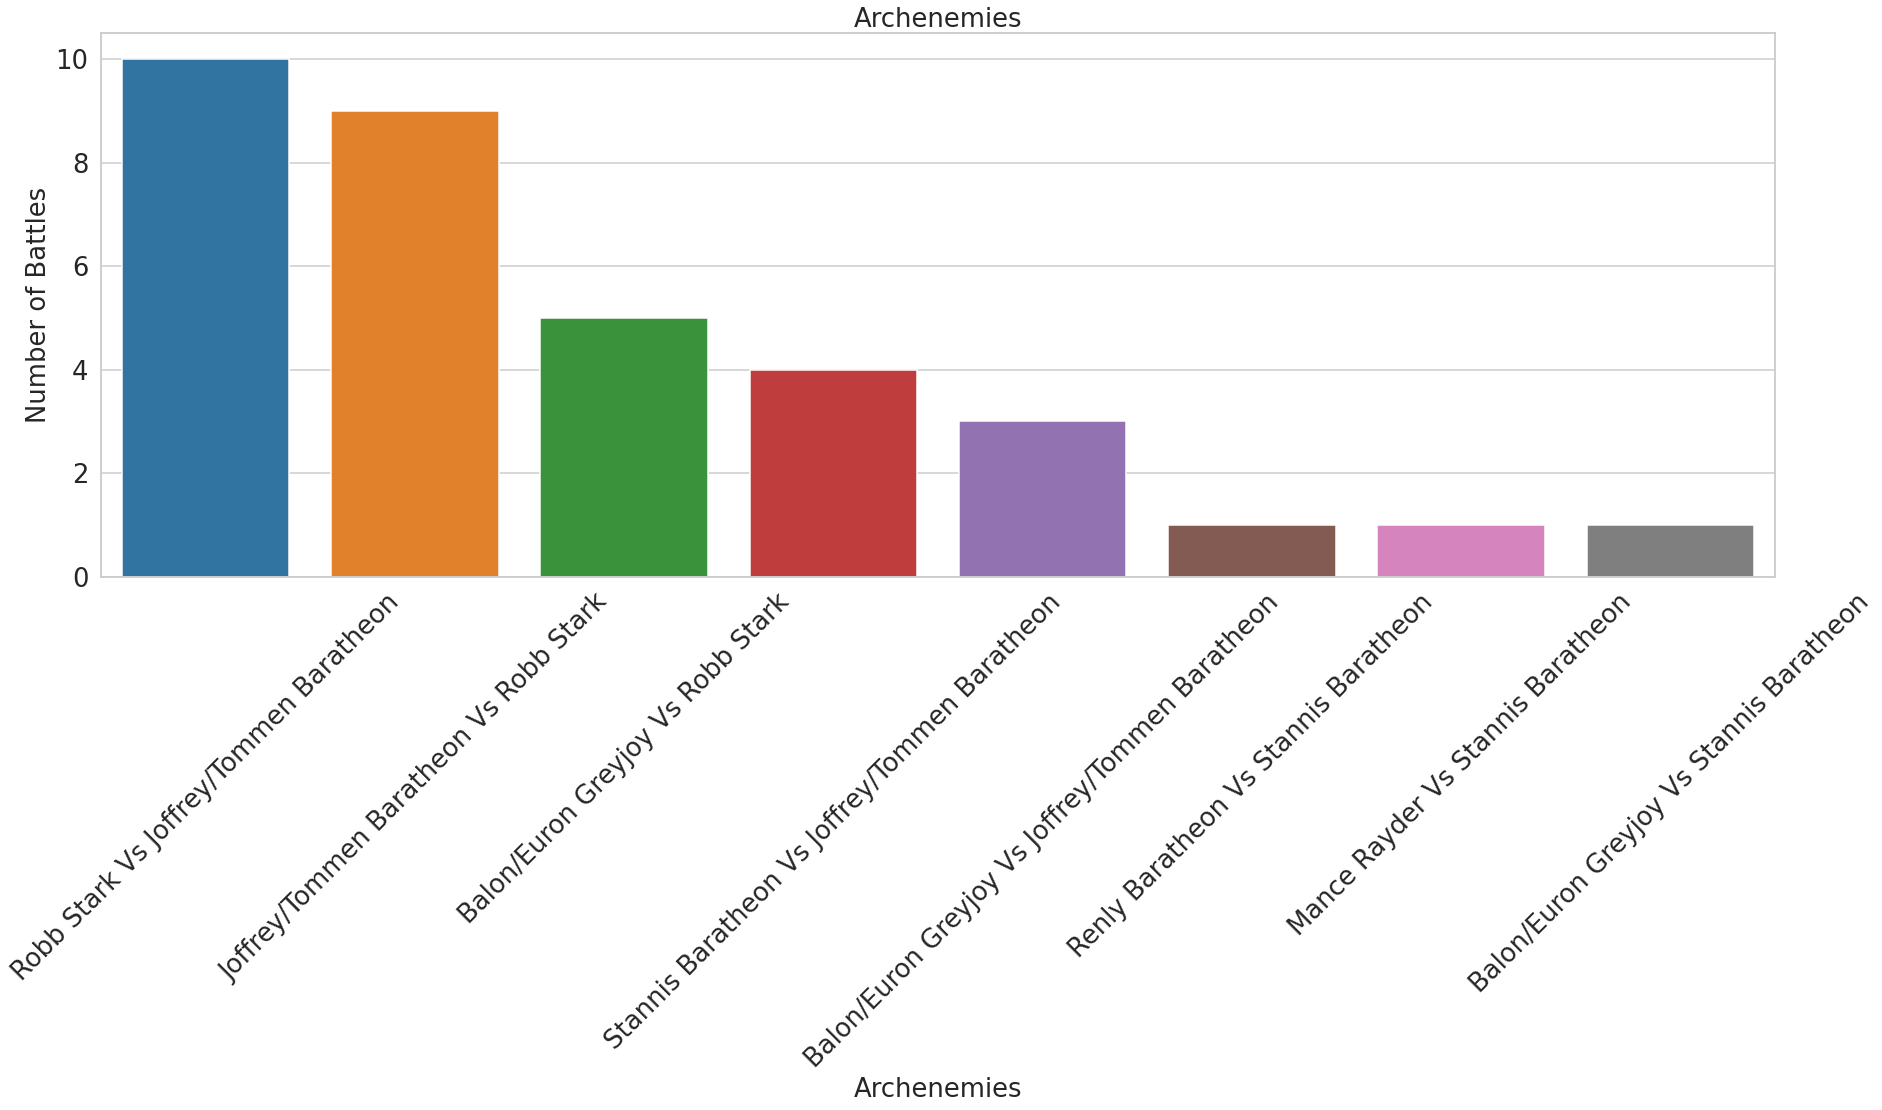

In [25]:
sns.barplot(data=archenemy_df, x='versus_text', y='battle_count')
plt.xticks(rotation=45)
plt.xlabel('Archenemies')
plt.ylabel('Number of Battles')
plt.title('Archenemies')
plt.show()

In [27]:
attack_winners=battles_df[battles_df.attacker_outcome=='win']['attacker_king'].value_counts().reset_index()

In [28]:
attack_winners.rename(columns={'index':'king', 'attacker_king':'wins'}, inplace=True)

In [30]:
attack_winners.loc[:,'win_type'] = 'attack'
defend_winners = battles_df[battles_df.attacker_outcome=='loss']['defender_king'].value_counts().reset_index()

In [31]:
defend_winners.rename(columns={'index':'king', 'defender_king':'wins'}, inplace=True)

In [32]:
defend_winners.loc[:,'win_type'] = 'defend'

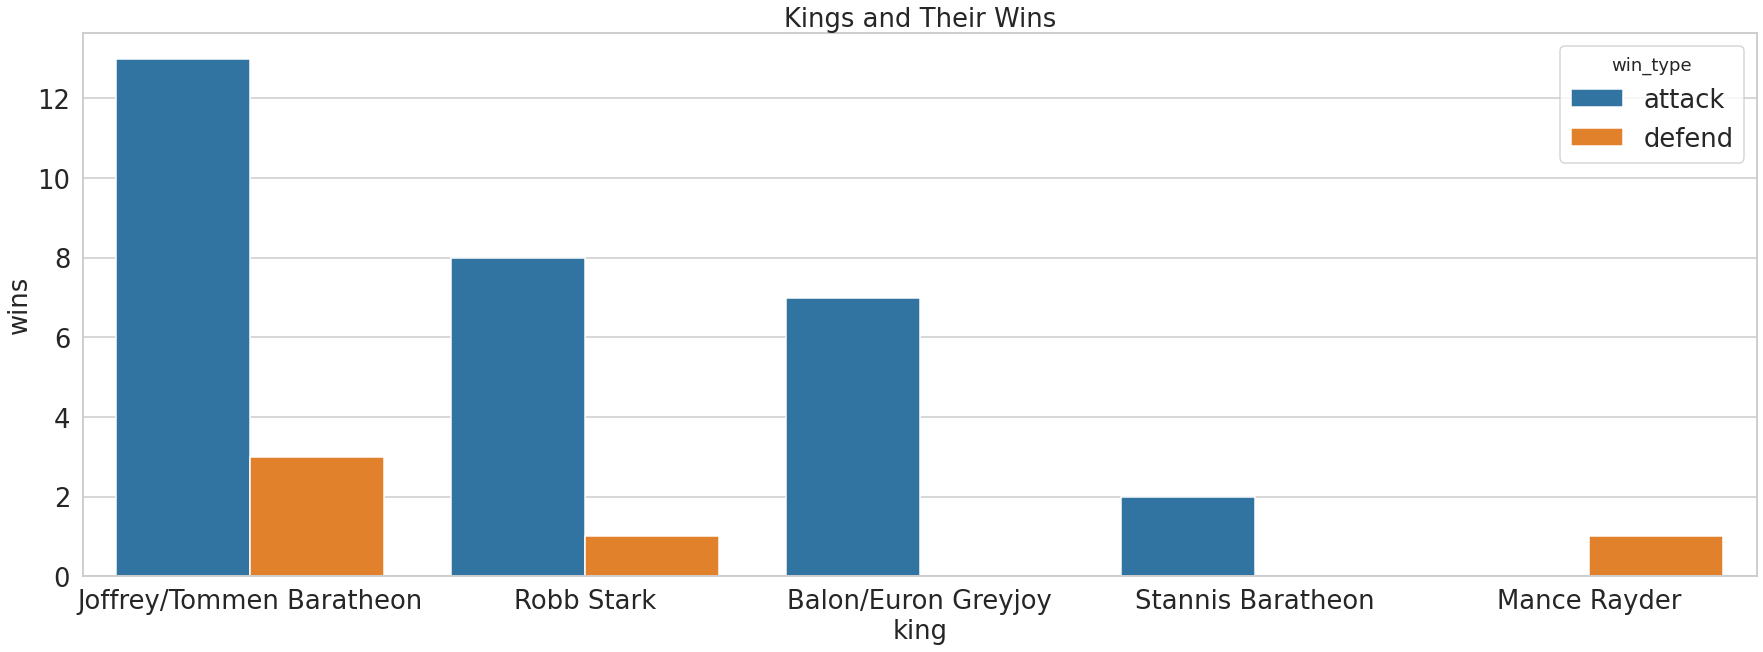

In [34]:
sns.barplot(x="king", y="wins", hue="win_type", data=pd.concat([attack_winners,defend_winners]))
plt.title('Kings and Their Wins')
plt.ylabel('wins')
plt.xlabel('king')
plt.show()